# Introduction 

The Nobel Prize, established in 1895 by Swedish chemist and industrialist Alfred Nobel, consists of annual international awards in various categories, recognizing exceptional achievements in academia, culture, and science. These awards, including Chemistry, Literature, Peace, Physics, and Physiology or Medicine, were first presented in 1901 and are esteemed as the most prestigious accolades within their respective domains.

# Data gather

## 1. Gather data by accessing APIs

The Nobel Prize website provides a free REST-based API for developers to access up-to-date information on Nobel Prizes and Laureates. This data is freely available and is synchronized with updates on the official website, including announcements of new Laureates. Here I access the API at this endpoint: https://api.nobelprize.org/2.1/laureates. In addition, the official Nobel Prize website is : https://www.nobelprize.org/about/developer-zone-2/. 

In [1]:
# import libraries
import pandas as pd
import requests

In [2]:
# fetch data from API
URL = 'https://api.nobelprize.org/2.1/laureates'
params = {'limit':'1000', 'offset':'1'}
response = requests.get(URL,params=params)

In [3]:
# print response
print(response)

<Response [200]>


In [4]:
# print response content
data = response.json()['laureates']
print(data)

[{'id': '102', 'knownName': {'en': 'Aage N. Bohr', 'se': 'Aage N. Bohr'}, 'givenName': {'en': 'Aage N.', 'se': 'Aage N.'}, 'familyName': {'en': 'Bohr', 'se': 'Bohr'}, 'fullName': {'en': 'Aage Niels Bohr', 'se': 'Aage Niels Bohr'}, 'fileName': 'bohr', 'gender': 'male', 'birth': {'date': '1922-06-19', 'place': {'city': {'en': 'Copenhagen', 'no': 'København', 'se': 'Köpenhamn'}, 'country': {'en': 'Denmark', 'no': 'Danmark', 'se': 'Danmark'}, 'cityNow': {'en': 'Copenhagen', 'no': 'København', 'se': 'Köpenhamn', 'sameAs': ['https://www.wikidata.org/wiki/Q1748', 'https://www.wikipedia.org/wiki/Copenhagen']}, 'countryNow': {'en': 'Denmark', 'no': 'Danmark', 'se': 'Danmark', 'sameAs': ['https://www.wikidata.org/wiki/Q35']}, 'continent': {'en': 'Europe', 'no': 'Europa', 'se': 'Europa'}, 'locationString': {'en': 'Copenhagen, Denmark', 'no': 'København, Danmark', 'se': 'Köpenhamn, Danmark'}}}, 'death': {'date': '2009-09-08', 'place': {'city': {'en': 'Copenhagen', 'no': 'København', 'se': 'Köpenha

In [5]:
# convert json to dataframe
from pandas.io.json import json_normalize
df = json_normalize(data)
df.head()

<ipython-input-5-03afa8b05f03>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(data)


id     fileName gender  \
0   102         bohr   male   
1   779  ciechanover   male   
2   259         klug   male   
3  1004       gurnah   male   
4   114        salam   male   

                                              sameAs  \
0  [https://www.wikidata.org/wiki/Q103854, https:...   
1  [https://www.wikidata.org/wiki/Q233205, https:...   
2  [https://www.wikidata.org/wiki/Q190626, https:...   
3  [https://www.wikidata.org/wiki/Q317877, https:...   
4  [https://www.wikidata.org/wiki/Q28189, https:/...   

                                               links  \
0  [{'rel': 'laureate', 'href': 'https://api.nobe...   
1  [{'rel': 'laureate', 'href': 'https://api.nobe...   
2  [{'rel': 'laureate', 'href': 'https://api.nobe...   
3  [{'rel': 'laureate', 'href': 'https://api.nobe...   
4  [{'rel': 'laureate', 'href': 'https://api.nobe...   

                                         nobelPrizes       knownName.en  \
0  [{'awardYear': '1975', 'category': {'en': 'Phy...       Aage N. Bohr   
1  [{'awardYear': '2004', 'category': {'en': 'Che...  Aaron Ciechanover   
2  [{'awardYear': '1982', 'category': {'en': 'Che...         Aaron Klug   
3  [{'awardYear': '2021', 'category': {'en': 'Lit...  Abdulrazak Gurnah   
4  [{'awardYear': '1979', 'category': {'en': 'Phy...        Abdus Salam   

        knownName.se givenName.en givenName.se  ... nativeName penName  \
0       Aage N. Bohr      Aage N.      Aage N.  ...        NaN     NaN   
1  Aaron Ciechanover        Aaron        Aaron  ...        NaN     NaN   
2         Aaron Klug        Aaron        Aaron  ...        NaN     NaN   
3  Abdulrazak Gurnah   Abdulrazak   Abdulrazak  ...        NaN     NaN   
4        Abdus Salam        Abdus        Abdus  ...        NaN     NaN   

  penNameOf.fullName foundedCountry.en foundedCountry.no foundedCountry.se  \
0                NaN               NaN               NaN               NaN   
1                NaN               NaN               NaN               NaN   
2                NaN               NaN               NaN               NaN   
3                NaN               NaN               NaN               NaN   
4                NaN               NaN               NaN               NaN   

  foundedCountryNow.en foundedCountryNow.no foundedCountryNow.se  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

  foundedContinent.en  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 101 columns]

In [6]:
# print shape of dataframe
df.shape

(980, 101)

This dataset contains 980 rows and 101 columns.

In [7]:
# print the first 5 row in the first 10 columns of dataframe
df.iloc[:5,:10]

id     fileName gender  \
0   102         bohr   male   
1   779  ciechanover   male   
2   259         klug   male   
3  1004       gurnah   male   
4   114        salam   male   

                                              sameAs  \
0  [https://www.wikidata.org/wiki/Q103854, https:...   
1  [https://www.wikidata.org/wiki/Q233205, https:...   
2  [https://www.wikidata.org/wiki/Q190626, https:...   
3  [https://www.wikidata.org/wiki/Q317877, https:...   
4  [https://www.wikidata.org/wiki/Q28189, https:/...   

                                               links  \
0  [{'rel': 'laureate', 'href': 'https://api.nobe...   
1  [{'rel': 'laureate', 'href': 'https://api.nobe...   
2  [{'rel': 'laureate', 'href': 'https://api.nobe...   
3  [{'rel': 'laureate', 'href': 'https://api.nobe...   
4  [{'rel': 'laureate', 'href': 'https://api.nobe...   

                                         nobelPrizes       knownName.en  \
0  [{'awardYear': '1975', 'category': {'en': 'Phy...       Aage N. Bohr   
1  [{'awardYear': '2004', 'category': {'en': 'Che...  Aaron Ciechanover   
2  [{'awardYear': '1982', 'category': {'en': 'Che...         Aaron Klug   
3  [{'awardYear': '2021', 'category': {'en': 'Lit...  Abdulrazak Gurnah   
4  [{'awardYear': '1979', 'category': {'en': 'Phy...        Abdus Salam   

        knownName.se givenName.en givenName.se  
0       Aage N. Bohr      Aage N.      Aage N.  
1  Aaron Ciechanover        Aaron        Aaron  
2         Aaron Klug        Aaron        Aaron  
3  Abdulrazak Gurnah   Abdulrazak   Abdulrazak  
4        Abdus Salam        Abdus        Abdus

In [8]:
# print the last 5 row in the last 30 columns of dataframe
df.iloc[-5:,-20:]

founded.place.countryNow.en founded.place.countryNow.no  \
975                         NaN                         NaN   
976                         NaN                         NaN   
977                         NaN                         NaN   
978                         NaN                         NaN   
979                         NaN                         NaN   

    founded.place.countryNow.se founded.place.countryNow.sameAs  \
975                         NaN                             NaN   
976                         NaN                             NaN   
977                         NaN                             NaN   
978                         NaN                             NaN   
979                         NaN                             NaN   

    founded.place.continent.en founded.place.continent.no  \
975                        NaN                        NaN   
976                        NaN                        NaN   
977                        NaN                        NaN   
978                        NaN                        NaN   
979                        NaN                        NaN   

    founded.place.continent.se founded.place.locationString.en  \
975                        NaN                             NaN   
976                        NaN                             NaN   
977                        NaN                             NaN   
978                        NaN                             NaN   
979                        NaN                             NaN   

    founded.place.locationString.no founded.place.locationString.se  \
975                             NaN                             NaN   
976                             NaN                             NaN   
977                             NaN                             NaN   
978                             NaN                             NaN   
979                             NaN                             NaN   

    nativeName penName penNameOf.fullName foundedCountry.en foundedCountry.no  \
975        NaN     NaN                NaN               NaN               NaN   
976        NaN     NaN                NaN               NaN               NaN   
977        NaN     NaN                NaN               NaN               NaN   
978        NaN     NaN                NaN               NaN               NaN   
979        NaN     NaN                NaN               NaN               NaN   

    foundedCountry.se foundedCountryNow.en foundedCountryNow.no  \
975               NaN                  NaN                  NaN   
976               NaN                  NaN                  NaN   
977               NaN                  NaN                  NaN   
978               NaN                  NaN                  NaN   
979               NaN                  NaN                  NaN   

    foundedCountryNow.se foundedContinent.en  
975                  NaN                 NaN  
976                  NaN                 NaN  
977                  NaN                 NaN  
978                  NaN                 NaN  
979                  NaN                 NaN

In [9]:
# print columns of dataframe
df.columns

Index(['id', 'fileName', 'gender', 'sameAs', 'links', 'nobelPrizes',
       'knownName.en', 'knownName.se', 'givenName.en', 'givenName.se',
       ...
       'nativeName', 'penName', 'penNameOf.fullName', 'foundedCountry.en',
       'foundedCountry.no', 'foundedCountry.se', 'foundedCountryNow.en',
       'foundedCountryNow.no', 'foundedCountryNow.se', 'foundedContinent.en'],
      dtype='object', length=101)

THe informations of the column name has different language version. So We only need to keep the english version and delete the other language.  

In [10]:
# print the column with missing values
len(df.columns[df.isnull().any()])

92

In [11]:
# print the column name has 'Name'
df.columns[df.columns.str.contains('Name')] 

Index(['fileName', 'knownName.en', 'knownName.se', 'givenName.en',
       'givenName.se', 'familyName.en', 'familyName.se', 'fullName.en',
       'fullName.se', 'knownName.no', 'givenName.no', 'familyName.no',
       'fullName.no', 'orgName.en', 'orgName.no', 'orgName.se', 'nativeName',
       'penName', 'penNameOf.fullName'],
      dtype='object')

In [12]:
# print the column name has 'Birth'
df.columns[df.columns.str.contains('Birth')]

Index([], dtype='object')

In [13]:
# print the column name has 'birth'
df.filter(like='birth').columns

Index(['birth.date', 'birth.place.city.en', 'birth.place.city.no',
       'birth.place.city.se', 'birth.place.country.en',
       'birth.place.country.no', 'birth.place.country.se',
       'birth.place.cityNow.en', 'birth.place.cityNow.no',
       'birth.place.cityNow.se', 'birth.place.cityNow.sameAs',
       'birth.place.countryNow.en', 'birth.place.countryNow.no',
       'birth.place.countryNow.se', 'birth.place.countryNow.sameAs',
       'birth.place.continent.en', 'birth.place.continent.no',
       'birth.place.continent.se', 'birth.place.locationString.en',
       'birth.place.locationString.no', 'birth.place.locationString.se'],
      dtype='object')

In [14]:
# print the column name has 'death'
df.filter(like='death').columns

Index(['death.date', 'death.place.city.en', 'death.place.city.no',
       'death.place.city.se', 'death.place.country.en',
       'death.place.country.no', 'death.place.country.se',
       'death.place.country.sameAs', 'death.place.cityNow.en',
       'death.place.cityNow.no', 'death.place.cityNow.se',
       'death.place.cityNow.sameAs', 'death.place.countryNow.en',
       'death.place.countryNow.no', 'death.place.countryNow.se',
       'death.place.countryNow.sameAs', 'death.place.continent.en',
       'death.place.continent.no', 'death.place.continent.se',
       'death.place.locationString.en', 'death.place.locationString.no',
       'death.place.locationString.se'],
      dtype='object')

In [15]:
# print the column name has 'founded'
df.filter(like='founded').columns

Index(['founded.date', 'founded.place.city.en', 'founded.place.city.no',
       'founded.place.city.se', 'founded.place.country.en',
       'founded.place.country.no', 'founded.place.country.se',
       'founded.place.country.sameAs', 'founded.place.cityNow.en',
       'founded.place.cityNow.no', 'founded.place.cityNow.se',
       'founded.place.cityNow.sameAs', 'founded.place.countryNow.en',
       'founded.place.countryNow.no', 'founded.place.countryNow.se',
       'founded.place.countryNow.sameAs', 'founded.place.continent.en',
       'founded.place.continent.no', 'founded.place.continent.se',
       'founded.place.locationString.en', 'founded.place.locationString.no',
       'founded.place.locationString.se', 'foundedCountry.en',
       'foundedCountry.no', 'foundedCountry.se', 'foundedCountryNow.en',
       'foundedCountryNow.no', 'foundedCountryNow.se', 'foundedContinent.en'],
      dtype='object')

The fetched API data, represented as 'df,' comprises 980 rows and 101 columns. Notably, the majority of these columns (92 out of 101) contain missing values. Additionally, some columns contain the same information presented in English, Swedish, and Norwegian, indicated by the '.en,' '.se,' and '.no' suffixes in the column names.

The columns can be categorized as follows: 

1. Name-related columns:: 'knownName.en', 'knownName.se', 'givenName.en', 'givenName.se',
       'familyName.en', 'familyName.se', 'fullName.en', 'fullName.se',
       'knownName.no', 'givenName.no', 'familyName.no', 'fullName.no',
       'orgName.en', 'orgName.no', 'orgName.se', 'nativeName', 'penName',
       'penNameOf.fullName';
2. Birth-related columns: 'birth.date', 'birth.place.city.en', 'birth.place.city.no',
       'birth.place.city.se', 'birth.place.country.en',
       'birth.place.country.no', 'birth.place.country.se',
       'birth.place.cityNow.en', 'birth.place.cityNow.no',
       'birth.place.cityNow.se', 'birth.place.cityNow.sameAs',
       'birth.place.countryNow.en', 'birth.place.countryNow.no',
       'birth.place.countryNow.se', 'birth.place.countryNow.sameAs',
       'birth.place.continent.en', 'birth.place.continent.no',
       'birth.place.continent.se', 'birth.place.locationString.en',
       'birth.place.locationString.no', 'birth.place.locationString.se';
3. Death-related columns: 'death.date', 'death.place.city.en', 'death.place.city.no',
       'death.place.city.se', 'death.place.country.en',
       'death.place.country.no', 'death.place.country.se',
       'death.place.country.sameAs', 'death.place.cityNow.en',
       'death.place.cityNow.no', 'death.place.cityNow.se',
       'death.place.cityNow.sameAs', 'death.place.countryNow.en',
       'death.place.countryNow.no', 'death.place.countryNow.se',
       'death.place.countryNow.sameAs', 'death.place.continent.en',
       'death.place.continent.no', 'death.place.continent.se',
       'death.place.locationString.en', 'death.place.locationString.no',
       'death.place.locationString.se'
4. Founded-related columns: 'founded.date', 'founded.place.city.en', 'founded.place.city.no',
       'founded.place.city.se', 'founded.place.country.en',
       'founded.place.country.no', 'founded.place.country.se',
       'founded.place.country.sameAs', 'founded.place.cityNow.en',
       'founded.place.cityNow.no', 'founded.place.cityNow.se',
       'founded.place.cityNow.sameAs', 'founded.place.countryNow.en',
       'founded.place.countryNow.no', 'founded.place.countryNow.se',
       'founded.place.countryNow.sameAs', 'founded.place.continent.en',
       'founded.place.continent.no', 'founded.place.continent.se',
       'founded.place.locationString.en', 'founded.place.locationString.no',
       'founded.place.locationString.se', 'foundedCountry.en',
       'foundedCountry.no', 'foundedCountry.se', 'foundedCountryNow.en',
       'foundedCountryNow.no', 'foundedCountryNow.se', 'foundedContinent.en'
5. Other columns:  These include 'gender' and other columns.

## 2. Download data manually:

The Kaggle website provides a dataset encompassing Nobel Prize laureates(winners) from 1901 to 2000. The website is : https://www.kaggle.com/datasets/bahramjannesarr/nobel-prize-from-1901-till-2020. 
This dataset can be directly obtained in CSV format directly from the Kaggle website.

In [16]:
# import libraries
import os

In [17]:
# print current working directory
os.listdir('.')

['nobel_final.csv', '.ipynb_checkpoints', 'Nobel_prize_analysis.ipynb']

In [18]:
# read csv file as dataframe
df_1 = pd.read_csv('nobel_final.csv')

In [19]:
# print shape of dataframe
df_1.shape

(923, 14)

The download dataset has 923 rows and 14 columns.

In [20]:
# print the first five rows of dataframe
df_1.head()

firstname    surname born_country_code died_country_code gender  year  \
0  Wilhelm Conrad    Röntgen                DE                DE   male  1901   
1      Hendrik A.    Lorentz                NL                NL   male  1902   
2          Pieter     Zeeman                NL                NL   male  1902   
3           Henri  Becquerel                FR                FR   male  1903   
4          Pierre      Curie                FR                FR   male  1903   

  category  share                                 name_of_university  \
0  physics      1                                  Munich University   
1  physics      2                                  Leiden University   
2  physics      2                               Amsterdam University   
3  physics      2                                École Polytechnique   
4  physics      4  École municipale de physique et de chimie indu...   

  city_of_university country_of_university born_month  age  age_get_prize  
0             Munich               Germany        Mar   78             56  
1             Leiden       the Netherlands        Jul   75             49  
2          Amsterdam       the Netherlands        May   78             37  
3              Paris                France        Dec   56             51  
4              Paris                France        May   47             44

In [21]:
# print columns of dataframe
df_1.columns

Index(['firstname', 'surname', 'born_country_code', 'died_country_code',
       'gender', 'year', 'category', 'share', 'name_of_university',
       'city_of_university', 'country_of_university', 'born_month', 'age',
       'age_get_prize'],
      dtype='object')

In [22]:
# check for missing values in dataframe
df_1.isnull().sum()

firstname                  0
surname                    2
born_country_code          0
died_country_code        306
gender                     0
year                       0
category                   0
share                      0
name_of_university       226
city_of_university       231
country_of_university    230
born_month                 0
age                        0
age_get_prize              0
dtype: int64

In [23]:
# check for duplicate values in dataframe
df_1.duplicated().sum()

0

The table 'df' you downloaded contains 923 rows and 14 columns. Notably, there are missing values in the following columns: 'died_country_code,' 'city_of_university,' 'country_of_university,' 'name_of_university,' and 'surname.' Additionally, it's worth mentioning that there are no duplicate values in this dataset.

## Data access
### 1. APT fetch dataset:

#### (1) missing values: 

In [24]:
# show the missing values in dataframe
df.isnull().sum().sort_values(ascending=False)

foundedContinent.en     979
foundedCountry.se       979
foundedCountry.en       979
foundedCountry.no       979
foundedCountryNow.se    979
                       ... 
nobelPrizes               0
wikipedia.slug            0
wikipedia.english         0
wikidata.id               0
id                        0
Length: 101, dtype: int64

After examining the columnar data with missing values above, we've identified that certain columns, particularly those related to the "founded place," contain more than 957 missing values. Notably, our dataset comprises 980 rows. To enhance data quality, it's advisable to eliminate columns with more than 50% missing values. 

In the following step of data cleaning, columns with more than 50% missing values were removed, including those related to the "founded place."

#### (2) Name related columnns:

In [25]:
# print the name related columns of dataframe
df[df.columns[:10]].head()

id     fileName gender  \
0   102         bohr   male   
1   779  ciechanover   male   
2   259         klug   male   
3  1004       gurnah   male   
4   114        salam   male   

                                              sameAs  \
0  [https://www.wikidata.org/wiki/Q103854, https:...   
1  [https://www.wikidata.org/wiki/Q233205, https:...   
2  [https://www.wikidata.org/wiki/Q190626, https:...   
3  [https://www.wikidata.org/wiki/Q317877, https:...   
4  [https://www.wikidata.org/wiki/Q28189, https:/...   

                                               links  \
0  [{'rel': 'laureate', 'href': 'https://api.nobe...   
1  [{'rel': 'laureate', 'href': 'https://api.nobe...   
2  [{'rel': 'laureate', 'href': 'https://api.nobe...   
3  [{'rel': 'laureate', 'href': 'https://api.nobe...   
4  [{'rel': 'laureate', 'href': 'https://api.nobe...   

                                         nobelPrizes       knownName.en  \
0  [{'awardYear': '1975', 'category': {'en': 'Phy...       Aage N. Bohr   
1  [{'awardYear': '2004', 'category': {'en': 'Che...  Aaron Ciechanover   
2  [{'awardYear': '1982', 'category': {'en': 'Che...         Aaron Klug   
3  [{'awardYear': '2021', 'category': {'en': 'Lit...  Abdulrazak Gurnah   
4  [{'awardYear': '1979', 'category': {'en': 'Phy...        Abdus Salam   

        knownName.se givenName.en givenName.se  
0       Aage N. Bohr      Aage N.      Aage N.  
1  Aaron Ciechanover        Aaron        Aaron  
2         Aaron Klug        Aaron        Aaron  
3  Abdulrazak Gurnah   Abdulrazak   Abdulrazak  
4        Abdus Salam        Abdus        Abdus

In [26]:
# print the first five rows of df_1
df_1.head()

firstname    surname born_country_code died_country_code gender  year  \
0  Wilhelm Conrad    Röntgen                DE                DE   male  1901   
1      Hendrik A.    Lorentz                NL                NL   male  1902   
2          Pieter     Zeeman                NL                NL   male  1902   
3           Henri  Becquerel                FR                FR   male  1903   
4          Pierre      Curie                FR                FR   male  1903   

  category  share                                 name_of_university  \
0  physics      1                                  Munich University   
1  physics      2                                  Leiden University   
2  physics      2                               Amsterdam University   
3  physics      2                                École Polytechnique   
4  physics      4  École municipale de physique et de chimie indu...   

  city_of_university country_of_university born_month  age  age_get_prize  
0             Munich               Germany        Mar   78             56  
1             Leiden       the Netherlands        Jul   75             49  
2          Amsterdam       the Netherlands        May   78             37  
3              Paris                France        Dec   56             51  
4              Paris                France        May   47             44

For the DataFrame 'df_1' obtained from Kaggle, we should extract and keep only the 'givenName.en' and 'familyName.en' columns, and then rename them as 'firstname' and 'surname' to facilitate the dataset integration. 

In [27]:
# print current columns of df
df.columns

Index(['id', 'fileName', 'gender', 'sameAs', 'links', 'nobelPrizes',
       'knownName.en', 'knownName.se', 'givenName.en', 'givenName.se',
       ...
       'nativeName', 'penName', 'penNameOf.fullName', 'foundedCountry.en',
       'foundedCountry.no', 'foundedCountry.se', 'foundedCountryNow.en',
       'foundedCountryNow.no', 'foundedCountryNow.se', 'foundedContinent.en'],
      dtype='object', length=101)

#### (3) Birth related columns:

In [28]:
# show the column names starting with 'birth'
df_filter = df.filter(like='birth').head()
df_filter.head()

birth.date birth.place.city.en birth.place.city.no birth.place.city.se  \
0  1922-06-19          Copenhagen           København           Köpenhamn   
1  1947-10-01               Haifa               Haifa               Haifa   
2  1926-08-11              Zelvas              Zelvas              Zelvas   
3  1948-00-00                 NaN                 NaN                 NaN   
4  1926-01-29      Jhang Maghiāna      Jhang Maghiāna      Jhang Maghiāna   

              birth.place.country.en birth.place.country.no  \
0                            Denmark                Danmark   
1  British Protectorate of Palestine    British i Palestina   
2                          Lithuania                Litauen   
3                                NaN                    NaN   
4                              India                  India   

              birth.place.country.se birth.place.cityNow.en  \
0                            Danmark             Copenhagen   
1  British Protectorate of Palestine                  Haifa   
2                            Litauen                 Zelvas   
3                                NaN                    NaN   
4                             Indien         Jhang Maghiāna   

  birth.place.cityNow.no birth.place.cityNow.se  ...  \
0              København              Köpenhamn  ...   
1                  Haifa                  Haifa  ...   
2                 Zelvas                 Zelvas  ...   
3                    NaN                    NaN  ...   
4         Jhang Maghiāna         Jhang Maghiāna  ...   

  birth.place.countryNow.en birth.place.countryNow.no  \
0                   Denmark                   Danmark   
1                    Israel                    Israel   
2                 Lithuania                   Litauen   
3                       NaN                       NaN   
4                  Pakistan                  Pakistan   

  birth.place.countryNow.se         birth.place.countryNow.sameAs  \
0                   Danmark   [https://www.wikidata.org/wiki/Q35]   
1                    Israel  [https://www.wikidata.org/wiki/Q801]   
2                   Litauen   [https://www.wikidata.org/wiki/Q37]   
3                       NaN                                   NaN   
4                  Pakistan  [https://www.wikidata.org/wiki/Q843]   

  birth.place.continent.en birth.place.continent.no birth.place.continent.se  \
0                   Europe                   Europa                   Europa   
1                     Asia                     Asia                    Asien   
2                   Europe                   Europa                   Europa   
3                      NaN                      NaN                      NaN   
4                     Asia                     Asia                    Asien   

                       birth.place.locationString.en  \
0                                Copenhagen, Denmark   
1  Haifa, British Protectorate of Palestine (now ...   
2                                  Zelvas, Lithuania   
3                                                NaN   
4               Jhang Maghiāna, India (now Pakistan)   

            birth.place.locationString.no  \
0                      København, Danmark   
1  Haifa, British i Palestina (nå Israel)   
2                         Zelvas, Litauen   
3                                     NaN   
4     Jhang Maghiāna, India (nå Pakistan)   

                       birth.place.locationString.se  
0                                 Köpenhamn, Danmark  
1  Haifa, British Protectorate of Palestine (nu I...  
2                                    Zelvas, Litauen  
3                                                NaN  
4               Jhang Maghiāna, Indien (nu Pakistan)  

[5 rows x 21 columns]

In [29]:
# show the filtered data whose column name ends with '.en'
df_filter.filter(regex='\.en$', axis=1).head()

birth.place.city.en             birth.place.country.en  \
0          Copenhagen                            Denmark   
1               Haifa  British Protectorate of Palestine   
2              Zelvas                          Lithuania   
3                 NaN                                NaN   
4      Jhang Maghiāna                              India   

  birth.place.cityNow.en birth.place.countryNow.en birth.place.continent.en  \
0             Copenhagen                   Denmark                   Europe   
1                  Haifa                    Israel                     Asia   
2                 Zelvas                 Lithuania                   Europe   
3                    NaN                       NaN                      NaN   
4         Jhang Maghiāna                  Pakistan                     Asia   

                       birth.place.locationString.en  
0                                Copenhagen, Denmark  
1  Haifa, British Protectorate of Palestine (now ...  
2                                  Zelvas, Lithuania  
3                                                NaN  
4               Jhang Maghiāna, India (now Pakistan)

We can optimize the dataset by exclusively selecting the English birthplace-related columns and removing duplicated data from the 'birth.place.locationString.en' column. For simplicity, we will concentrate on the current birthplace name, denoted as 'birth.place.cityNow.en' and 'birth.place.countryNow.en,' which we'll relabel as 'birth place' and 'birth place country,' respectively.

#### (4) Death related columns

In [30]:
# show the filtered data whose column name starts with 'death'
df_death_filter = df.filter(regex='^death', axis=1)
df_death_filter.head()

death.date death.place.city.en death.place.city.no death.place.city.se  \
0  2009-09-08          Copenhagen           København           Köpenhamn   
1         NaN                 NaN                 NaN                 NaN   
2  2018-11-20                 NaN                 NaN                 NaN   
3         NaN                 NaN                 NaN                 NaN   
4  1996-11-21              Oxford              Oxford              Oxford   

  death.place.country.en death.place.country.no death.place.country.se  \
0                Denmark                Danmark                Danmark   
1                    NaN                    NaN                    NaN   
2                    NaN                    NaN                    NaN   
3                    NaN                    NaN                    NaN   
4         United Kingdom          Storbritannia         Storbritannien   

           death.place.country.sameAs death.place.cityNow.en  \
0   https://www.wikidata.org/wiki/Q35             Copenhagen   
1                                 NaN                    NaN   
2                                 NaN                    NaN   
3                                 NaN                    NaN   
4  https://www.wikidata.org/wiki/Q145                 Oxford   

  death.place.cityNow.no  ... death.place.countryNow.en  \
0              København  ...                   Denmark   
1                    NaN  ...                       NaN   
2                    NaN  ...                       NaN   
3                    NaN  ...                       NaN   
4                 Oxford  ...            United Kingdom   

  death.place.countryNow.no death.place.countryNow.se  \
0                   Danmark                   Danmark   
1                       NaN                       NaN   
2                       NaN                       NaN   
3                       NaN                       NaN   
4             Storbritannia            Storbritannien   

          death.place.countryNow.sameAs death.place.continent.en  \
0   [https://www.wikidata.org/wiki/Q35]                   Europe   
1                                   NaN                      NaN   
2                                   NaN                      NaN   
3                                   NaN                      NaN   
4  [https://www.wikidata.org/wiki/Q145]                   Europe   

  death.place.continent.no death.place.continent.se  \
0                   Europa                   Europa   
1                      NaN                      NaN   
2                      NaN                      NaN   
3                      NaN                      NaN   
4                   Europa                   Europa   

  death.place.locationString.en death.place.locationString.no  \
0           Copenhagen, Denmark            København, Danmark   
1                           NaN                           NaN   
2                                                               
3                           NaN                           NaN   
4        Oxford, United Kingdom         Oxford, Storbritannia   

  death.place.locationString.se  
0            Köpenhamn, Danmark  
1                           NaN  
2                                
3                           NaN  
4        Oxford, Storbritannien  

[5 rows x 22 columns]

In [31]:
df_death_filter.columns

Index(['death.date', 'death.place.city.en', 'death.place.city.no',
       'death.place.city.se', 'death.place.country.en',
       'death.place.country.no', 'death.place.country.se',
       'death.place.country.sameAs', 'death.place.cityNow.en',
       'death.place.cityNow.no', 'death.place.cityNow.se',
       'death.place.cityNow.sameAs', 'death.place.countryNow.en',
       'death.place.countryNow.no', 'death.place.countryNow.se',
       'death.place.countryNow.sameAs', 'death.place.continent.en',
       'death.place.continent.no', 'death.place.continent.se',
       'death.place.locationString.en', 'death.place.locationString.no',
       'death.place.locationString.se'],
      dtype='object')

From the analysis above, we can select the column 'death.date', 'death.place.cityNow.en', 'death.place.countryNow.en','death.place.continent.en'.

#### (5) Exploring the Data in the 'nobelPrizes' Column:

In [32]:
# print the first row in nobelPrizes column
df['nobelPrizes'][0]

[{'awardYear': '1975',
  'category': {'en': 'Physics', 'no': 'Fysikk', 'se': 'Fysik'},
  'categoryFullName': {'en': 'The Nobel Prize in Physics',
   'no': 'Nobelprisen i fysikk',
   'se': 'Nobelpriset i fysik'},
  'sortOrder': '1',
  'portion': '1/3',
  'dateAwarded': '1975-10-17',
  'prizeStatus': 'received',
  'motivation': {'en': 'for the discovery of the connection between collective motion and particle motion in atomic nuclei and the development of the theory of the structure of the atomic nucleus based on this connection',
   'se': 'för upptäckten av sambandet mellan kollektiva rörelser och partikelrörelser i atomkärnor, samt den därpå baserade utvecklingen av teorien för atomkärnans struktur'},
  'prizeAmount': 630000,
  'prizeAmountAdjusted': 3465908,
  'affiliations': [{'name': {'en': 'Niels Bohr Institute',
     'no': 'Niels Bohr Institute',
     'se': 'Niels Bohr Institute'},
    'nameNow': {'en': 'Niels Bohr Institute'},
    'city': {'en': 'Copenhagen', 'no': 'København', '

From the text, we can extract the award year, category in english, award data, prized status, motivation in english, affliations.   

In [33]:
# extract the year from the first row in nobelPrizes column
df['nobelPrizes'][0][0]['awardYear']

'1975'

In [34]:
# extract the category from the first row in nobelPrizes column
df['nobelPrizes'][0][0]['category']['en']

'Physics'

In [35]:
# extract the dateAwarded from the first row in nobelPrizes column
df['nobelPrizes'][0][0]['dateAwarded']

'1975-10-17'

In [36]:
# extratc the prizeStatus from the first row in nobelPrizes column
df['nobelPrizes'][0][0]['prizeStatus']

'received'

In [37]:
# extract the motivation from the first row in nobelPrizes column
df['nobelPrizes'][0][0]['motivation']['en']

'for the discovery of the connection between collective motion and particle motion in atomic nuclei and the development of the theory of the structure of the atomic nucleus based on this connection'

In [38]:
# extract the affiliations from the first row in nobelPrizes column
df['nobelPrizes'][0][0]['affiliations'][0]['nameNow']['en']

'Niels Bohr Institute'

In [39]:
# test 
df.head()

id     fileName gender  \
0   102         bohr   male   
1   779  ciechanover   male   
2   259         klug   male   
3  1004       gurnah   male   
4   114        salam   male   

                                              sameAs  \
0  [https://www.wikidata.org/wiki/Q103854, https:...   
1  [https://www.wikidata.org/wiki/Q233205, https:...   
2  [https://www.wikidata.org/wiki/Q190626, https:...   
3  [https://www.wikidata.org/wiki/Q317877, https:...   
4  [https://www.wikidata.org/wiki/Q28189, https:/...   

                                               links  \
0  [{'rel': 'laureate', 'href': 'https://api.nobe...   
1  [{'rel': 'laureate', 'href': 'https://api.nobe...   
2  [{'rel': 'laureate', 'href': 'https://api.nobe...   
3  [{'rel': 'laureate', 'href': 'https://api.nobe...   
4  [{'rel': 'laureate', 'href': 'https://api.nobe...   

                                         nobelPrizes       knownName.en  \
0  [{'awardYear': '1975', 'category': {'en': 'Phy...       Aage N. Bohr   
1  [{'awardYear': '2004', 'category': {'en': 'Che...  Aaron Ciechanover   
2  [{'awardYear': '1982', 'category': {'en': 'Che...         Aaron Klug   
3  [{'awardYear': '2021', 'category': {'en': 'Lit...  Abdulrazak Gurnah   
4  [{'awardYear': '1979', 'category': {'en': 'Phy...        Abdus Salam   

        knownName.se givenName.en givenName.se  ... nativeName penName  \
0       Aage N. Bohr      Aage N.      Aage N.  ...        NaN     NaN   
1  Aaron Ciechanover        Aaron        Aaron  ...        NaN     NaN   
2         Aaron Klug        Aaron        Aaron  ...        NaN     NaN   
3  Abdulrazak Gurnah   Abdulrazak   Abdulrazak  ...        NaN     NaN   
4        Abdus Salam        Abdus        Abdus  ...        NaN     NaN   

  penNameOf.fullName foundedCountry.en foundedCountry.no foundedCountry.se  \
0                NaN               NaN               NaN               NaN   
1                NaN               NaN               NaN               NaN   
2                NaN               NaN               NaN               NaN   
3                NaN               NaN               NaN               NaN   
4                NaN               NaN               NaN               NaN   

  foundedCountryNow.en foundedCountryNow.no foundedCountryNow.se  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

  foundedContinent.en  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 101 columns]

### 2.Downloaded dataset: 

In [40]:
# print the first five rows of df_1
df_1.head()

firstname    surname born_country_code died_country_code gender  year  \
0  Wilhelm Conrad    Röntgen                DE                DE   male  1901   
1      Hendrik A.    Lorentz                NL                NL   male  1902   
2          Pieter     Zeeman                NL                NL   male  1902   
3           Henri  Becquerel                FR                FR   male  1903   
4          Pierre      Curie                FR                FR   male  1903   

  category  share                                 name_of_university  \
0  physics      1                                  Munich University   
1  physics      2                                  Leiden University   
2  physics      2                               Amsterdam University   
3  physics      2                                École Polytechnique   
4  physics      4  École municipale de physique et de chimie indu...   

  city_of_university country_of_university born_month  age  age_get_prize  
0             Munich               Germany        Mar   78             56  
1             Leiden       the Netherlands        Jul   75             49  
2          Amsterdam       the Netherlands        May   78             37  
3              Paris                France        Dec   56             51  
4              Paris                France        May   47             44

In [41]:
# check the missing values in df_1
df_1.isnull().sum().sort_values(ascending=False)

died_country_code        306
city_of_university       231
country_of_university    230
name_of_university       226
surname                    2
age_get_prize              0
age                        0
born_month                 0
share                      0
category                   0
year                       0
gender                     0
born_country_code          0
firstname                  0
dtype: int64

# Data cleaing 

In [42]:
# copy the dataset 
df_clean = df.copy()
df_1_clean = df_1.copy()

## Quality Issue 1: Remove the Columns with More than 50% Missing Values

As some columns in the *df* dataframe, notably those associated with the "founded place," have more than 957 missing values, we improve data quality by removing columns with over 50% missing values.

In [43]:
# delete the columns which have more than 50% missing values
df_clean.dropna(thresh=len(df_clean)*0.5, axis=1, inplace=True)

In [44]:
# test the missing values in df_clean again
df_clean.isnull().sum().sort_values(ascending=False)

death.place.country.sameAs    374
death.place.cityNow.sameAs    354
death.place.city.no           340
death.place.city.se           340
death.place.cityNow.no        340
                             ... 
nobelPrizes                     0
wikidata.id                     0
wikipedia.slug                  0
wikipedia.english               0
id                              0
Length: 61, dtype: int64

## Quality Issue 2: Remove Duplicate Columns and Retain Only the English Version in *df*

Delete the column names ends with 'se' and 'no'.

In [45]:
# delete columns whose names end with 'se' and 'no'
df_clean = df_clean.drop(df_clean.columns[df_clean.columns.str.endswith('se')], axis=1)
df_clean = df_clean.drop(df_clean.columns[df_clean.columns.str.endswith('no')], axis=1)

In [46]:
# test 
df_clean.columns

Index(['id', 'fileName', 'gender', 'sameAs', 'links', 'nobelPrizes',
       'knownName.en', 'givenName.en', 'familyName.en', 'fullName.en',
       'birth.date', 'birth.place.city.en', 'birth.place.country.en',
       'birth.place.cityNow.en', 'birth.place.cityNow.sameAs',
       'birth.place.countryNow.en', 'birth.place.countryNow.sameAs',
       'birth.place.continent.en', 'birth.place.locationString.en',
       'death.date', 'death.place.city.en', 'death.place.country.en',
       'death.place.country.sameAs', 'death.place.cityNow.en',
       'death.place.cityNow.sameAs', 'death.place.countryNow.en',
       'death.place.countryNow.sameAs', 'death.place.continent.en',
       'death.place.locationString.en', 'wikipedia.slug', 'wikipedia.english',
       'wikidata.id', 'wikidata.url'],
      dtype='object')

## Quality Issue 2: Drop Unnecessary Name-Related columns  

1. Only keep the 'givenName.en' and 'familyName.en' columns and delete the other name related columns in *df*; 
2. Rename these two column in *df* as 'firstname' and 'surname' to facilitate the dataset integration. 

In [47]:
# print the first five rows of the first 10 columns of df_clean
df_clean[df_clean.columns[:10]].head()

id     fileName gender  \
0   102         bohr   male   
1   779  ciechanover   male   
2   259         klug   male   
3  1004       gurnah   male   
4   114        salam   male   

                                              sameAs  \
0  [https://www.wikidata.org/wiki/Q103854, https:...   
1  [https://www.wikidata.org/wiki/Q233205, https:...   
2  [https://www.wikidata.org/wiki/Q190626, https:...   
3  [https://www.wikidata.org/wiki/Q317877, https:...   
4  [https://www.wikidata.org/wiki/Q28189, https:/...   

                                               links  \
0  [{'rel': 'laureate', 'href': 'https://api.nobe...   
1  [{'rel': 'laureate', 'href': 'https://api.nobe...   
2  [{'rel': 'laureate', 'href': 'https://api.nobe...   
3  [{'rel': 'laureate', 'href': 'https://api.nobe...   
4  [{'rel': 'laureate', 'href': 'https://api.nobe...   

                                         nobelPrizes       knownName.en  \
0  [{'awardYear': '1975', 'category': {'en': 'Phy...       Aage N. Bohr   
1  [{'awardYear': '2004', 'category': {'en': 'Che...  Aaron Ciechanover   
2  [{'awardYear': '1982', 'category': {'en': 'Che...         Aaron Klug   
3  [{'awardYear': '2021', 'category': {'en': 'Lit...  Abdulrazak Gurnah   
4  [{'awardYear': '1979', 'category': {'en': 'Phy...        Abdus Salam   

  givenName.en familyName.en        fullName.en  
0      Aage N.          Bohr    Aage Niels Bohr  
1        Aaron   Ciechanover  Aaron Ciechanover  
2        Aaron          Klug         Aaron Klug  
3   Abdulrazak        Gurnah  Abdulrazak Gurnah  
4        Abdus         Salam        Abdus Salam

In [48]:
# print the columns of df_clean
df_clean.columns[:10]

Index(['id', 'fileName', 'gender', 'sameAs', 'links', 'nobelPrizes',
       'knownName.en', 'givenName.en', 'familyName.en', 'fullName.en'],
      dtype='object')

In [49]:
# drop the columns whose names are 'knownName.en' and 'fullName.en'
del_col_name = ['knownName.en', 'fullName.en']
df_clean = df_clean.drop(del_col_name, axis=1)

In [50]:
# rename the columns 'givenName.en' and 'familyName.en' to 'firstname' and 'surname' respectively
df_clean.rename(columns={'givenName.en':'firstname', 'familyName.en':'surname'}, inplace=True)

In [51]:
# test 
df_clean[df_clean.columns[:10]].head()

id     fileName gender  \
0   102         bohr   male   
1   779  ciechanover   male   
2   259         klug   male   
3  1004       gurnah   male   
4   114        salam   male   

                                              sameAs  \
0  [https://www.wikidata.org/wiki/Q103854, https:...   
1  [https://www.wikidata.org/wiki/Q233205, https:...   
2  [https://www.wikidata.org/wiki/Q190626, https:...   
3  [https://www.wikidata.org/wiki/Q317877, https:...   
4  [https://www.wikidata.org/wiki/Q28189, https:/...   

                                               links  \
0  [{'rel': 'laureate', 'href': 'https://api.nobe...   
1  [{'rel': 'laureate', 'href': 'https://api.nobe...   
2  [{'rel': 'laureate', 'href': 'https://api.nobe...   
3  [{'rel': 'laureate', 'href': 'https://api.nobe...   
4  [{'rel': 'laureate', 'href': 'https://api.nobe...   

                                         nobelPrizes   firstname      surname  \
0  [{'awardYear': '1975', 'category': {'en': 'Phy...     Aage N.         Bohr   
1  [{'awardYear': '2004', 'category': {'en': 'Che...       Aaron  Ciechanover   
2  [{'awardYear': '1982', 'category': {'en': 'Che...       Aaron         Klug   
3  [{'awardYear': '2021', 'category': {'en': 'Lit...  Abdulrazak       Gurnah   
4  [{'awardYear': '1979', 'category': {'en': 'Phy...       Abdus        Salam   

   birth.date birth.place.city.en  
0  1922-06-19          Copenhagen  
1  1947-10-01               Haifa  
2  1926-08-11              Zelvas  
3  1948-00-00                 NaN  
4  1926-01-29      Jhang Maghiāna

## Quality Issue 3: Drop duplicate Information in Birthplace Columns

1. Delete the unwanted columns related to birth places and only retain the columns 'birth.place.cityNow.en','birth.place.countryNow.en', 'birth.place.continent.en';
2. Rename the columns 'birth.place.cityNow.en','birth.place.countryNow.en','birth.place.continent.en' to 'born_city', 'born_country' and 'born_continent' respectively;
3. Rename the column 'birth.date' to 'born_date'.

In [52]:
# show the column names starting with 'birth'
df_clean.filter(like='birth').head()

birth.date birth.place.city.en             birth.place.country.en  \
0  1922-06-19          Copenhagen                            Denmark   
1  1947-10-01               Haifa  British Protectorate of Palestine   
2  1926-08-11              Zelvas                          Lithuania   
3  1948-00-00                 NaN                                NaN   
4  1926-01-29      Jhang Maghiāna                              India   

  birth.place.cityNow.en                         birth.place.cityNow.sameAs  \
0             Copenhagen  [https://www.wikidata.org/wiki/Q1748, https://...   
1                  Haifa  [https://www.wikidata.org/wiki/Q41621, https:/...   
2                 Zelvas  [https://www.wikidata.org/wiki/Q691679, https:...   
3                    NaN                                                NaN   
4         Jhang Maghiāna  [https://www.wikidata.org/wiki/Q1026616, https...   

  birth.place.countryNow.en         birth.place.countryNow.sameAs  \
0                   Denmark   [https://www.wikidata.org/wiki/Q35]   
1                    Israel  [https://www.wikidata.org/wiki/Q801]   
2                 Lithuania   [https://www.wikidata.org/wiki/Q37]   
3                       NaN                                   NaN   
4                  Pakistan  [https://www.wikidata.org/wiki/Q843]   

  birth.place.continent.en                      birth.place.locationString.en  
0                   Europe                                Copenhagen, Denmark  
1                     Asia  Haifa, British Protectorate of Palestine (now ...  
2                   Europe                                  Zelvas, Lithuania  
3                      NaN                                                NaN  
4                     Asia               Jhang Maghiāna, India (now Pakistan)

In [53]:
# print the related columns of df_clean
df_clean.filter(like='birth').columns

Index(['birth.date', 'birth.place.city.en', 'birth.place.country.en',
       'birth.place.cityNow.en', 'birth.place.cityNow.sameAs',
       'birth.place.countryNow.en', 'birth.place.countryNow.sameAs',
       'birth.place.continent.en', 'birth.place.locationString.en'],
      dtype='object')

In [54]:
# delete the unwanted columns related to birth place
del_col_name = ['birth.place.city.en', 'birth.place.country.en', 'birth.place.cityNow.sameAs',
      'birth.place.countryNow.sameAs', 'birth.place.locationString.en']
df_clean = df_clean.drop(del_col_name, axis=1)

In [55]:
# test
df_clean.filter(like='birth').head()

birth.date birth.place.cityNow.en birth.place.countryNow.en  \
0  1922-06-19             Copenhagen                   Denmark   
1  1947-10-01                  Haifa                    Israel   
2  1926-08-11                 Zelvas                 Lithuania   
3  1948-00-00                    NaN                       NaN   
4  1926-01-29         Jhang Maghiāna                  Pakistan   

  birth.place.continent.en  
0                   Europe  
1                     Asia  
2                   Europe  
3                      NaN  
4                     Asia

In [56]:
# rename the columns 'birth.place.cityNow.en','birth.place.countryNow.en','birth.place.continent.en' to 'born_city', 'born_country' and 'born_continent' respectively
df_clean.rename(columns={'birth.place.cityNow.en':'born_city', 'birth.place.countryNow.en':'born_country', 'birth.place.continent.en':'born_continent'}, inplace=True)

In [57]:
# rename the column 'birth.date' to 'born_date'
df_clean.rename(columns={'birth.date':'born_date'}, inplace=True)

In [58]:
# test 
df_clean.filter(like='born').head()

born_date       born_city born_country born_continent
0  1922-06-19      Copenhagen      Denmark         Europe
1  1947-10-01           Haifa       Israel           Asia
2  1926-08-11          Zelvas    Lithuania         Europe
3  1948-00-00             NaN          NaN            NaN
4  1926-01-29  Jhang Maghiāna     Pakistan           Asia

## Quality issue 4: Duplicate Information in Death Place Columns

1. Delete the unwanted columns related to death place and only retain the column 'death.date','death.place.cityNow.en','death.place.countryNow.en','death.place.continent.en';
2. Rename the columns 'death.place.cityNow.en','death.place.countryNow.en','death.place.continent.en' to 'death_city', 'death_country' and 'death_continent' respectively;
3. Eename the column 'death.date' to 'death_date'.

In [59]:
# print the column names starting with 'death'
df_clean.filter(like='death').head()

death.date death.place.city.en death.place.country.en  \
0  2009-09-08          Copenhagen                Denmark   
1         NaN                 NaN                    NaN   
2  2018-11-20                 NaN                    NaN   
3         NaN                 NaN                    NaN   
4  1996-11-21              Oxford         United Kingdom   

           death.place.country.sameAs death.place.cityNow.en  \
0   https://www.wikidata.org/wiki/Q35             Copenhagen   
1                                 NaN                    NaN   
2                                 NaN                    NaN   
3                                 NaN                    NaN   
4  https://www.wikidata.org/wiki/Q145                 Oxford   

                          death.place.cityNow.sameAs  \
0  [https://www.wikidata.org/wiki/Q1748, https://...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  [https://www.wikidata.org/wiki/Q34217, https:/...   

  death.place.countryNow.en         death.place.countryNow.sameAs  \
0                   Denmark   [https://www.wikidata.org/wiki/Q35]   
1                       NaN                                   NaN   
2                       NaN                                   NaN   
3                       NaN                                   NaN   
4            United Kingdom  [https://www.wikidata.org/wiki/Q145]   

  death.place.continent.en death.place.locationString.en  
0                   Europe           Copenhagen, Denmark  
1                      NaN                           NaN  
2                      NaN                                
3                      NaN                           NaN  
4                   Europe        Oxford, United Kingdom

In [60]:
# print the column names starting with 'death'
df_clean.filter(like='death').columns

Index(['death.date', 'death.place.city.en', 'death.place.country.en',
       'death.place.country.sameAs', 'death.place.cityNow.en',
       'death.place.cityNow.sameAs', 'death.place.countryNow.en',
       'death.place.countryNow.sameAs', 'death.place.continent.en',
       'death.place.locationString.en'],
      dtype='object')

In [61]:
# delete the unwanted columns related to death place
del_col_name = ['death.place.city.en', 'death.place.country.en',
       'death.place.country.sameAs','death.place.cityNow.sameAs',
       'death.place.countryNow.sameAs','death.place.locationString.en']
df_clean = df_clean.drop(del_col_name, axis=1)

In [62]:
# test
df_clean.filter(like='death').head()

death.date death.place.cityNow.en death.place.countryNow.en  \
0  2009-09-08             Copenhagen                   Denmark   
1         NaN                    NaN                       NaN   
2  2018-11-20                    NaN                       NaN   
3         NaN                    NaN                       NaN   
4  1996-11-21                 Oxford            United Kingdom   

  death.place.continent.en  
0                   Europe  
1                      NaN  
2                      NaN  
3                      NaN  
4                   Europe

In [63]:
# rename the columns 'death.place.cityNow.en','death.place.countryNow.en','death.place.continent.en' to 'death_city', 'death_country' and 'death_continent' respectively
df_clean.rename(columns={'death.place.cityNow.en':'death_city', 'death.place.countryNow.en':'death_country', 'death.place.continent.en':'death_continent'}, inplace=True)

In [64]:
# test 
df_clean.filter(like='death').head()

death.date  death_city   death_country death_continent
0  2009-09-08  Copenhagen         Denmark          Europe
1         NaN         NaN             NaN             NaN
2  2018-11-20         NaN             NaN             NaN
3         NaN         NaN             NaN             NaN
4  1996-11-21      Oxford  United Kingdom          Europe

In [65]:
# rename the column 'death.date' to 'death_date'
df_clean.rename(columns={'death.date':'death_date'}, inplace=True)

In [66]:
# test 
df_clean.filter(like='death').head()

death_date  death_city   death_country death_continent
0  2009-09-08  Copenhagen         Denmark          Europe
1         NaN         NaN             NaN             NaN
2  2018-11-20         NaN             NaN             NaN
3         NaN         NaN             NaN             NaN
4  1996-11-21      Oxford  United Kingdom          Europe

## Quality issue 5: Remove the unnecessary columns including 'id','fileName','sameAs','links' and related wiki related columns

1. Drop the unnecessary columns 'id','fileName','sameAs','links';
2. Delete the column names start with 'wikid'.

In [67]:
# drop the the unnecessary columns including 'id','fileName','sameAs','links'
del_un_col_name = ['id','fileName','sameAs','links']
df_clean = df_clean.drop(del_un_col_name, axis=1)

In [68]:
# test 
df_clean.head()

gender                                        nobelPrizes   firstname  \
0   male  [{'awardYear': '1975', 'category': {'en': 'Phy...     Aage N.   
1   male  [{'awardYear': '2004', 'category': {'en': 'Che...       Aaron   
2   male  [{'awardYear': '1982', 'category': {'en': 'Che...       Aaron   
3   male  [{'awardYear': '2021', 'category': {'en': 'Lit...  Abdulrazak   
4   male  [{'awardYear': '1979', 'category': {'en': 'Phy...       Abdus   

       surname   born_date       born_city born_country born_continent  \
0         Bohr  1922-06-19      Copenhagen      Denmark         Europe   
1  Ciechanover  1947-10-01           Haifa       Israel           Asia   
2         Klug  1926-08-11          Zelvas    Lithuania         Europe   
3       Gurnah  1948-00-00             NaN          NaN            NaN   
4        Salam  1926-01-29  Jhang Maghiāna     Pakistan           Asia   

   death_date  death_city   death_country death_continent     wikipedia.slug  \
0  2009-09-08  Copenhagen         Denmark          Europe          Aage_Bohr   
1         NaN         NaN             NaN             NaN  Aaron_Ciechanover   
2  2018-11-20         NaN             NaN             NaN         Aaron_Klug   
3         NaN         NaN             NaN             NaN  Abdulrazak_Gurnah   
4  1996-11-21      Oxford  United Kingdom          Europe        Abdus_Salam   

                                 wikipedia.english wikidata.id  \
0          https://en.wikipedia.org/wiki/Aage_Bohr     Q103854   
1  https://en.wikipedia.org/wiki/Aaron_Ciechanover     Q233205   
2         https://en.wikipedia.org/wiki/Aaron_Klug     Q190626   
3  https://en.wikipedia.org/wiki/Abdulrazak_Gurnah     Q317877   
4        https://en.wikipedia.org/wiki/Abdus_Salam      Q28189   

                            wikidata.url  
0  https://www.wikidata.org/wiki/Q103854  
1  https://www.wikidata.org/wiki/Q233205  
2  https://www.wikidata.org/wiki/Q190626  
3  https://www.wikidata.org/wiki/Q317877  
4   https://www.wikidata.org/wiki/Q28189

In [69]:
# delete the column names start with 'wikid'
df_clean = df_clean.drop(df_clean.columns[df_clean.columns.str.startswith('wiki')], axis=1)

In [70]:
# test 
df_clean.head()

gender                                        nobelPrizes   firstname  \
0   male  [{'awardYear': '1975', 'category': {'en': 'Phy...     Aage N.   
1   male  [{'awardYear': '2004', 'category': {'en': 'Che...       Aaron   
2   male  [{'awardYear': '1982', 'category': {'en': 'Che...       Aaron   
3   male  [{'awardYear': '2021', 'category': {'en': 'Lit...  Abdulrazak   
4   male  [{'awardYear': '1979', 'category': {'en': 'Phy...       Abdus   

       surname   born_date       born_city born_country born_continent  \
0         Bohr  1922-06-19      Copenhagen      Denmark         Europe   
1  Ciechanover  1947-10-01           Haifa       Israel           Asia   
2         Klug  1926-08-11          Zelvas    Lithuania         Europe   
3       Gurnah  1948-00-00             NaN          NaN            NaN   
4        Salam  1926-01-29  Jhang Maghiāna     Pakistan           Asia   

   death_date  death_city   death_country death_continent  
0  2009-09-08  Copenhagen         Denmark          Europe  
1         NaN         NaN             NaN             NaN  
2  2018-11-20         NaN             NaN             NaN  
3         NaN         NaN             NaN             NaN  
4  1996-11-21      Oxford  United Kingdom          Europe

## Tidiness issue 1: Extract the information from the nobelPrize column

1. Extract the column 'awardYear', 'category','prizeStatus', 'motivation' from the 'nobelPrize' column by lambda function;
2. Extract the column 'dateAwarded', 'affiliations' and concatenate them into a string by define function; 
3. Delete the 'nobelPrizes' column.

In [71]:
# extract the above information from the nobelPrizes column
df_clean['awardYear'] = df_clean['nobelPrizes'].apply(lambda x: x[0]['awardYear'])
df_clean['category'] = df_clean['nobelPrizes'].apply(lambda x: x[0]['category']['en'])
#df_clean['dateAwarded'] = df_clean['nobelPrizes'].apply(lambda x: x[0]['dateAwarded'])
df_clean['prizeStatus'] = df_clean['nobelPrizes'].apply(lambda x: x[0]['prizeStatus'])
df_clean['motivation'] = df_clean['nobelPrizes'].apply(lambda x: x[0]['motivation']['en'])

In [72]:
# define a function to extract the dateawarded from the nobelPrizes column
def extract_date_awarded(nobel_prizes):
    if nobel_prizes:
        nobel_prize = nobel_prizes[0]
        if 'dateAwarded' in nobel_prize:
            return nobel_prize['dateAwarded']
    return None

df_clean['dateAwarded'] = df_clean['nobelPrizes'].apply(extract_date_awarded)

In [73]:
# Define a custom function to extract 'affiliations' and concatenate them into a string
def extract_and_concat_affiliations(row):
    affiliations = []
    for prize in row:
        if 'affiliations' in prize:
            affiliations.extend([x['nameNow']['en'] for x in prize['affiliations']])
    return ', '.join(affiliations)  # Concatenate the affiliations with a comma separator

# Apply the custom function to create a new 'affiliations' column
df_clean['affiliations'] = df_clean['nobelPrizes'].apply(extract_and_concat_affiliations)

In [74]:
# test
df_clean.head()

gender                                        nobelPrizes   firstname  \
0   male  [{'awardYear': '1975', 'category': {'en': 'Phy...     Aage N.   
1   male  [{'awardYear': '2004', 'category': {'en': 'Che...       Aaron   
2   male  [{'awardYear': '1982', 'category': {'en': 'Che...       Aaron   
3   male  [{'awardYear': '2021', 'category': {'en': 'Lit...  Abdulrazak   
4   male  [{'awardYear': '1979', 'category': {'en': 'Phy...       Abdus   

       surname   born_date       born_city born_country born_continent  \
0         Bohr  1922-06-19      Copenhagen      Denmark         Europe   
1  Ciechanover  1947-10-01           Haifa       Israel           Asia   
2         Klug  1926-08-11          Zelvas    Lithuania         Europe   
3       Gurnah  1948-00-00             NaN          NaN            NaN   
4        Salam  1926-01-29  Jhang Maghiāna     Pakistan           Asia   

   death_date  death_city   death_country death_continent awardYear  \
0  2009-09-08  Copenhagen         Denmark          Europe      1975   
1         NaN         NaN             NaN             NaN      2004   
2  2018-11-20         NaN             NaN             NaN      1982   
3         NaN         NaN             NaN             NaN      2021   
4  1996-11-21      Oxford  United Kingdom          Europe      1979   

     category prizeStatus                                         motivation  \
0     Physics    received  for the discovery of the connection between co...   
1   Chemistry    received  for the discovery of ubiquitin-mediated protei...   
2   Chemistry    received  for his development of crystallographic electr...   
3  Literature    received  for his uncompromising and compassionate penet...   
4     Physics    received  for their contributions to the theory of the u...   

  dateAwarded                                       affiliations  
0  1975-10-17                               Niels Bohr Institute  
1  2004-10-06          Technion - Israel Institute of Technology  
2  1982-10-18                MRC Laboratory of Molecular Biology  
3  2021-10-07                                                     
4  1979-10-15  International Centre for Theoretical Physics, ...

In [75]:
# delete the nobelPrizes column
df_clean = df_clean.drop('nobelPrizes', axis=1)
# test 
df_clean.head()

gender   firstname      surname   born_date       born_city born_country  \
0   male     Aage N.         Bohr  1922-06-19      Copenhagen      Denmark   
1   male       Aaron  Ciechanover  1947-10-01           Haifa       Israel   
2   male       Aaron         Klug  1926-08-11          Zelvas    Lithuania   
3   male  Abdulrazak       Gurnah  1948-00-00             NaN          NaN   
4   male       Abdus        Salam  1926-01-29  Jhang Maghiāna     Pakistan   

  born_continent  death_date  death_city   death_country death_continent  \
0         Europe  2009-09-08  Copenhagen         Denmark          Europe   
1           Asia         NaN         NaN             NaN             NaN   
2         Europe  2018-11-20         NaN             NaN             NaN   
3            NaN         NaN         NaN             NaN             NaN   
4           Asia  1996-11-21      Oxford  United Kingdom          Europe   

  awardYear    category prizeStatus  \
0      1975     Physics    received   
1      2004   Chemistry    received   
2      1982   Chemistry    received   
3      2021  Literature    received   
4      1979     Physics    received   

                                          motivation dateAwarded  \
0  for the discovery of the connection between co...  1975-10-17   
1  for the discovery of ubiquitin-mediated protei...  2004-10-06   
2  for his development of crystallographic electr...  1982-10-18   
3  for his uncompromising and compassionate penet...  2021-10-07   
4  for their contributions to the theory of the u...  1979-10-15   

                                        affiliations  
0                               Niels Bohr Institute  
1          Technion - Israel Institute of Technology  
2                MRC Laboratory of Molecular Biology  
3                                                     
4  International Centre for Theoretical Physics, ...

## Quality issue 7: drop the missing values in *df* and *df_1* 

In [76]:
# delete the rows with missing values
df_clean_1 = df_clean.dropna()

In [77]:
# print the shape of df_clean_1
df_clean_1.shape

(634, 17)

In [78]:
# print the first five rows of df_clean_1
df_clean_1.head()

gender firstname    surname   born_date         born_city born_country  \
0    male   Aage N.       Bohr  1922-06-19        Copenhagen      Denmark   
4    male     Abdus      Salam  1926-01-29    Jhang Maghiāna     Pakistan   
9    male     Adolf  Butenandt  1903-03-24  Bremerhaven-Lehe      Germany   
11   male     Adolf    Windaus  1876-12-25            Berlin      Germany   
13   male     Ahmed     Zewail  1946-02-26          Damanhur        Egypt   

   born_continent  death_date    death_city   death_country death_continent  \
0          Europe  2009-09-08    Copenhagen         Denmark          Europe   
4            Asia  1996-11-21        Oxford  United Kingdom          Europe   
9          Europe  1995-01-18        Munich         Germany          Europe   
11         Europe  1959-06-09     Göttingen         Germany          Europe   
13         Africa  2016-08-02  Pasadena, CA             USA   North America   

   awardYear   category prizeStatus  \
0       1975    Physics    received   
4       1979    Physics    received   
9       1939  Chemistry    received   
11      1928  Chemistry    received   
13      1999  Chemistry    received   

                                           motivation dateAwarded  \
0   for the discovery of the connection between co...  1975-10-17   
4   for their contributions to the theory of the u...  1979-10-15   
9                        for his work on sex hormones  1939-11-09   
11  for the services rendered through his research...  1928-11-13   
13  for his studies of the transition states of ch...  1999-10-12   

                                         affiliations  
0                                Niels Bohr Institute  
4   International Centre for Theoretical Physics, ...  
9   Kaiser-Wilhelm-Institut (now Max-Planck-Instit...  
11                              Goettingen University  
13       California Institute of Technology (Caltech)

In [79]:
# delete the rows with missing values
df_1_clean_2 = df_1_clean.dropna()

In [80]:
# print the shape of df_1_clean_2
df_1_clean_2.shape

(442, 14)

In [81]:
# print the first five rows of df_1_clean_2
df_1_clean_2.head()

firstname    surname born_country_code died_country_code gender  year  \
0  Wilhelm Conrad    Röntgen                DE                DE   male  1901   
1      Hendrik A.    Lorentz                NL                NL   male  1902   
2          Pieter     Zeeman                NL                NL   male  1902   
3           Henri  Becquerel                FR                FR   male  1903   
4          Pierre      Curie                FR                FR   male  1903   

  category  share                                 name_of_university  \
0  physics      1                                  Munich University   
1  physics      2                                  Leiden University   
2  physics      2                               Amsterdam University   
3  physics      2                                École Polytechnique   
4  physics      4  École municipale de physique et de chimie indu...   

  city_of_university country_of_university born_month  age  age_get_prize  
0             Munich               Germany        Mar   78             56  
1             Leiden       the Netherlands        Jul   75             49  
2          Amsterdam       the Netherlands        May   78             37  
3              Paris                France        Dec   56             51  
4              Paris                France        May   47             44

## Tidiness issue 2: Merge Two Dataframes 

1. Merge Two Dataframes *df_clean* and *df_1_clean* on the column 'firstname', 'surname' as *df_final*;
2. Delete the column names end with '_y' in *df_final* ;
3. Rename the column names end with '_x' by removing '_x' in *df_final*;
4. Delete the column 'affiliations', 'year' and 'born_month' in *df_final*. 


In [82]:
# print the columns of df_clean_1
df_clean_1.columns

Index(['gender', 'firstname', 'surname', 'born_date', 'born_city',
       'born_country', 'born_continent', 'death_date', 'death_city',
       'death_country', 'death_continent', 'awardYear', 'category',
       'prizeStatus', 'motivation', 'dateAwarded', 'affiliations'],
      dtype='object')

In [83]:
# print the columns of df_1_clean_2
df_1_clean_2.columns

Index(['firstname', 'surname', 'born_country_code', 'died_country_code',
       'gender', 'year', 'category', 'share', 'name_of_university',
       'city_of_university', 'country_of_university', 'born_month', 'age',
       'age_get_prize'],
      dtype='object')

In [84]:
# merge the two dataframes on 'firstname' and 'surname'
df_final = pd.merge(df_clean_1, df_1_clean_2, on=['firstname', 'surname'])

In [85]:
# print the columns of df_final
df_final.columns

Index(['gender_x', 'firstname', 'surname', 'born_date', 'born_city',
       'born_country', 'born_continent', 'death_date', 'death_city',
       'death_country', 'death_continent', 'awardYear', 'category_x',
       'prizeStatus', 'motivation', 'dateAwarded', 'affiliations',
       'born_country_code', 'died_country_code', 'gender_y', 'year',
       'category_y', 'share', 'name_of_university', 'city_of_university',
       'country_of_university', 'born_month', 'age', 'age_get_prize'],
      dtype='object')

In [86]:
# print the length of columns in df_final
len(df_final.columns)

29

In [87]:
# print the first 15 columns of df_final
df_final[df_final.columns[:15]].head()

gender_x firstname    surname   born_date         born_city born_country  \
0     male   Aage N.       Bohr  1922-06-19        Copenhagen      Denmark   
1     male     Abdus      Salam  1926-01-29    Jhang Maghiāna     Pakistan   
2     male     Adolf  Butenandt  1903-03-24  Bremerhaven-Lehe      Germany   
3     male     Adolf    Windaus  1876-12-25            Berlin      Germany   
4     male     Ahmed     Zewail  1946-02-26          Damanhur        Egypt   

  born_continent  death_date    death_city   death_country death_continent  \
0         Europe  2009-09-08    Copenhagen         Denmark          Europe   
1           Asia  1996-11-21        Oxford  United Kingdom          Europe   
2         Europe  1995-01-18        Munich         Germany          Europe   
3         Europe  1959-06-09     Göttingen         Germany          Europe   
4         Africa  2016-08-02  Pasadena, CA             USA   North America   

  awardYear category_x prizeStatus  \
0      1975    Physics    received   
1      1979    Physics    received   
2      1939  Chemistry    received   
3      1928  Chemistry    received   
4      1999  Chemistry    received   

                                          motivation  
0  for the discovery of the connection between co...  
1  for their contributions to the theory of the u...  
2                       for his work on sex hormones  
3  for the services rendered through his research...  
4  for his studies of the transition states of ch...

In [88]:
# print the last 15 columns of df_final
df_final[df_final.columns[-15:]].head()

motivation dateAwarded  \
0  for the discovery of the connection between co...  1975-10-17   
1  for their contributions to the theory of the u...  1979-10-15   
2                       for his work on sex hormones  1939-11-09   
3  for the services rendered through his research...  1928-11-13   
4  for his studies of the transition states of ch...  1999-10-12   

                                        affiliations born_country_code  \
0                               Niels Bohr Institute                DK   
1  International Centre for Theoretical Physics, ...                PK   
2  Kaiser-Wilhelm-Institut (now Max-Planck-Instit...                DE   
3                              Goettingen University                DE   
4       California Institute of Technology (Caltech)                EG   

  died_country_code gender_y  year category_y  share  \
0                DK     male  1975    physics      3   
1                GB     male  1979    physics      3   
2                DE     male  1939  chemistry      2   
3                DE     male  1928  chemistry      1   
4                US     male  1999  chemistry      1   

                                  name_of_university city_of_university  \
0                               Niels Bohr Institute         Copenhagen   
1       International Centre for Theoretical Physics            Trieste   
2  Kaiser-Wilhelm-Institut (now Max-Planck-Instit...      Berlin-Dahlem   
3                              Goettingen University          Göttingen   
4       California Institute of Technology (Caltech)        Pasadena CA   

  country_of_university born_month  age  age_get_prize  
0               Denmark        Jun   87             53  
1                 Italy        Jan   70             53  
2               Germany        Mar   92             36  
3               Germany        Dec   83             52  
4                   USA        Feb   70             53

In [89]:
# delete the column names end with '_y'
df_final = df_final.drop(df_final.columns[df_final.columns.str.endswith('_y')], axis=1)

In [90]:
# show the row with the column names end with '_x' and rename them by removing '_x'
df_final = df_final.rename(columns=lambda x: x[:-2] if x.endswith('_x') else x)
# test
df_final.columns

Index(['gender', 'firstname', 'surname', 'born_date', 'born_city',
       'born_country', 'born_continent', 'death_date', 'death_city',
       'death_country', 'death_continent', 'awardYear', 'category',
       'prizeStatus', 'motivation', 'dateAwarded', 'affiliations',
       'born_country_code', 'died_country_code', 'year', 'share',
       'name_of_university', 'city_of_university', 'country_of_university',
       'born_month', 'age', 'age_get_prize'],
      dtype='object')

In [91]:
# print the first 15 columns of df_final
df_final[df_final.columns[:15]].head()

gender firstname    surname   born_date         born_city born_country  \
0   male   Aage N.       Bohr  1922-06-19        Copenhagen      Denmark   
1   male     Abdus      Salam  1926-01-29    Jhang Maghiāna     Pakistan   
2   male     Adolf  Butenandt  1903-03-24  Bremerhaven-Lehe      Germany   
3   male     Adolf    Windaus  1876-12-25            Berlin      Germany   
4   male     Ahmed     Zewail  1946-02-26          Damanhur        Egypt   

  born_continent  death_date    death_city   death_country death_continent  \
0         Europe  2009-09-08    Copenhagen         Denmark          Europe   
1           Asia  1996-11-21        Oxford  United Kingdom          Europe   
2         Europe  1995-01-18        Munich         Germany          Europe   
3         Europe  1959-06-09     Göttingen         Germany          Europe   
4         Africa  2016-08-02  Pasadena, CA             USA   North America   

  awardYear   category prizeStatus  \
0      1975    Physics    received   
1      1979    Physics    received   
2      1939  Chemistry    received   
3      1928  Chemistry    received   
4      1999  Chemistry    received   

                                          motivation  
0  for the discovery of the connection between co...  
1  for their contributions to the theory of the u...  
2                       for his work on sex hormones  
3  for the services rendered through his research...  
4  for his studies of the transition states of ch...

In [92]:
# print the last 15 columns of df_final
df_final[df_final.columns[-15:]].head()

category prizeStatus                                         motivation  \
0    Physics    received  for the discovery of the connection between co...   
1    Physics    received  for their contributions to the theory of the u...   
2  Chemistry    received                       for his work on sex hormones   
3  Chemistry    received  for the services rendered through his research...   
4  Chemistry    received  for his studies of the transition states of ch...   

  dateAwarded                                       affiliations  \
0  1975-10-17                               Niels Bohr Institute   
1  1979-10-15  International Centre for Theoretical Physics, ...   
2  1939-11-09  Kaiser-Wilhelm-Institut (now Max-Planck-Instit...   
3  1928-11-13                              Goettingen University   
4  1999-10-12       California Institute of Technology (Caltech)   

  born_country_code died_country_code  year  share  \
0                DK                DK  1975      3   
1                PK                GB  1979      3   
2                DE                DE  1939      2   
3                DE                DE  1928      1   
4                EG                US  1999      1   

                                  name_of_university city_of_university  \
0                               Niels Bohr Institute         Copenhagen   
1       International Centre for Theoretical Physics            Trieste   
2  Kaiser-Wilhelm-Institut (now Max-Planck-Instit...      Berlin-Dahlem   
3                              Goettingen University          Göttingen   
4       California Institute of Technology (Caltech)        Pasadena CA   

  country_of_university born_month  age  age_get_prize  
0               Denmark        Jun   87             53  
1                 Italy        Jan   70             53  
2               Germany        Mar   92             36  
3               Germany        Dec   83             52  
4                   USA        Feb   70             53

In the given dataframe, we observe redundancy between the 'affiliations' and 'name_of_university' columns, as well as between the 'awardYear' and 'year' columns. To eliminate this redundancy, we will remove the 'affiliations' and 'Year' columns.

In [93]:
# delete the column 'affiliations' and 'year'
df_final = df_final.drop(['affiliations', 'year'], axis=1)

In [94]:
# test 
df_final.columns

Index(['gender', 'firstname', 'surname', 'born_date', 'born_city',
       'born_country', 'born_continent', 'death_date', 'death_city',
       'death_country', 'death_continent', 'awardYear', 'category',
       'prizeStatus', 'motivation', 'dateAwarded', 'born_country_code',
       'died_country_code', 'share', 'name_of_university',
       'city_of_university', 'country_of_university', 'born_month', 'age',
       'age_get_prize'],
      dtype='object')

In [95]:
# delete the 'born_month' column 
df_final = df_final.drop('born_month', axis=1)

In [96]:
# test
df_final.head()

gender firstname    surname   born_date         born_city born_country  \
0   male   Aage N.       Bohr  1922-06-19        Copenhagen      Denmark   
1   male     Abdus      Salam  1926-01-29    Jhang Maghiāna     Pakistan   
2   male     Adolf  Butenandt  1903-03-24  Bremerhaven-Lehe      Germany   
3   male     Adolf    Windaus  1876-12-25            Berlin      Germany   
4   male     Ahmed     Zewail  1946-02-26          Damanhur        Egypt   

  born_continent  death_date    death_city   death_country  ...  \
0         Europe  2009-09-08    Copenhagen         Denmark  ...   
1           Asia  1996-11-21        Oxford  United Kingdom  ...   
2         Europe  1995-01-18        Munich         Germany  ...   
3         Europe  1959-06-09     Göttingen         Germany  ...   
4         Africa  2016-08-02  Pasadena, CA             USA  ...   

                                          motivation dateAwarded  \
0  for the discovery of the connection between co...  1975-10-17   
1  for their contributions to the theory of the u...  1979-10-15   
2                       for his work on sex hormones  1939-11-09   
3  for the services rendered through his research...  1928-11-13   
4  for his studies of the transition states of ch...  1999-10-12   

  born_country_code died_country_code share  \
0                DK                DK     3   
1                PK                GB     3   
2                DE                DE     2   
3                DE                DE     1   
4                EG                US     1   

                                  name_of_university city_of_university  \
0                               Niels Bohr Institute         Copenhagen   
1       International Centre for Theoretical Physics            Trieste   
2  Kaiser-Wilhelm-Institut (now Max-Planck-Instit...      Berlin-Dahlem   
3                              Goettingen University          Göttingen   
4       California Institute of Technology (Caltech)        Pasadena CA   

  country_of_university  age age_get_prize  
0               Denmark   87            53  
1                 Italy   70            53  
2               Germany   92            36  
3               Germany   83            52  
4                   USA   70            53  

[5 rows x 24 columns]

In [104]:
# print the columns of df_final
df_final.columns

Index(['gender', 'firstname', 'surname', 'born_date', 'born_city',
       'born_country', 'born_continent', 'death_date', 'death_city',
       'death_country', 'death_continent', 'awardYear', 'category',
       'prizeStatus', 'motivation', 'dateAwarded', 'born_country_code',
       'died_country_code', 'share', 'name_of_university',
       'city_of_university', 'country_of_university', 'age', 'age_get_prize'],
      dtype='object')

# Analyzing and Visualizing Data

### Question 1: Gender Distribution Among Nobel Prize Laureates

In [97]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Gender Distribution')

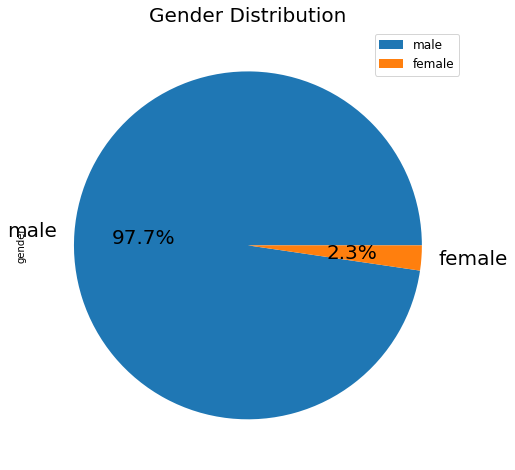

In [98]:
df_final['gender'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    figsize=(8,8),
    fontsize=20)
# Set legend size
plt.legend(fontsize=12) 
# Set the title and adjust its size
plt.title('Gender Distribution', fontsize=20) 

## Question 2: Distribution of the winners' age and age got the Nobel Prize

Text(0.5, 1.0, 'Age Distribution')

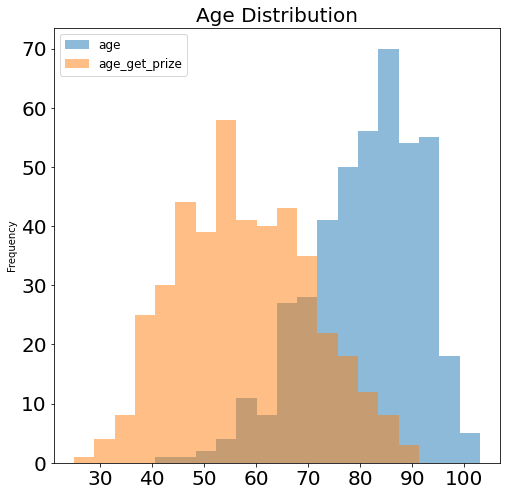

In [99]:
# ploy the histogram of 'age' and 'age_get_prize' columns
df_final[['age', 'age_get_prize']].plot(
    kind='hist',
    bins=20,
    figsize=(8,8),
    alpha=0.5,
    fontsize=20)
# Set legend size
plt.legend(fontsize=12)
# Set the title and adjust its size
plt.title('Age Distribution', fontsize=20)

# Question 3: Analyzing the Geographical Distribution of Nobel Prize Laureates: Birthplaces, Countries of Death, and Countries of Achievement

Text(0.5, 1.0, 'Country of University Distribution')

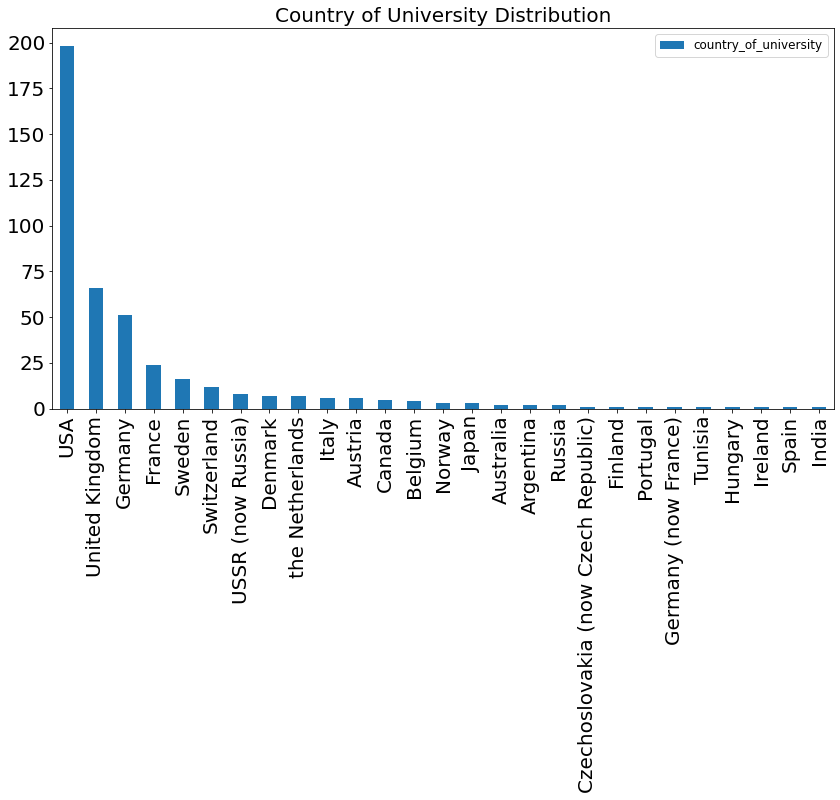

In [107]:
# ploy the histogram of 'born_country','death_country' and 'country_of_university' columns
df_final['country_of_university'].value_counts().plot(
    kind='bar',
    figsize=(14,7),
    fontsize=20)
# Set legend size
plt.legend(fontsize=12)
# Set the title and adjust its size
plt.title('Country of University Distribution', fontsize=20)

Text(0.5, 1.0, 'Born Country Distribution')

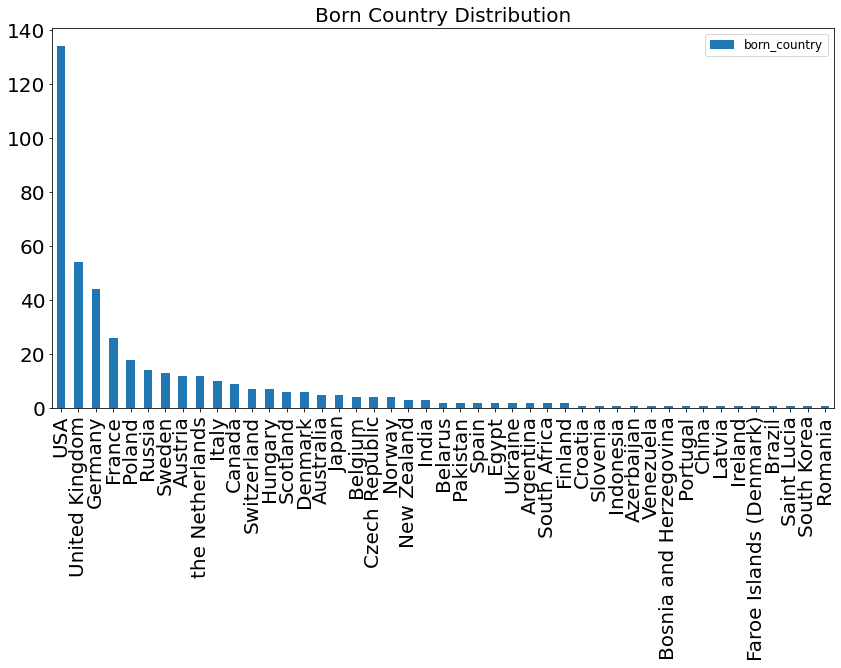

In [115]:
# plot the histogram of 'born_country' columns
df_final['born_country'].value_counts().plot(
    kind='bar',
    figsize=(14,7),
    fontsize=20)
# Set legend size
plt.legend(fontsize=12)
# Set the title and adjust its size
plt.title('Born Country Distribution', fontsize=20)

Text(0.5, 1.0, 'Death Country Distribution')

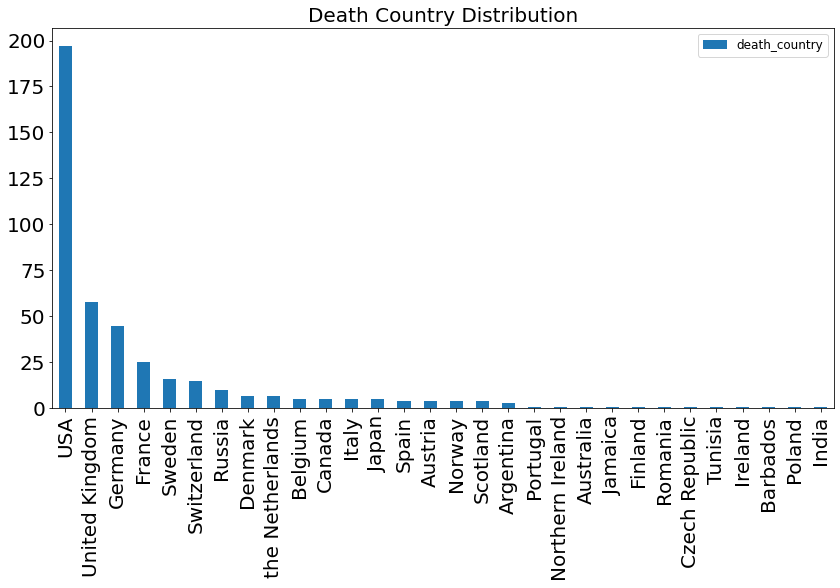

In [116]:
#plot the histogram of 'death_country' columns
df_final['death_country'].value_counts().plot(
    kind='bar',
    figsize=(14,7),
    fontsize=20)
# Set legend size
plt.legend(fontsize=12)
# Set the title and adjust its size
plt.title('Death Country Distribution', fontsize=20)